In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt
import datetime
import base64
import plotly.graph_objects as go
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **Data Analysis**

In [2]:
ds= pd.read_csv("https://raw.githubusercontent.com/Jyotika999/MINI-PROJECT-/main/districts%20(1).csv")
ds=ds.drop(columns='Tested')
ds=ds.drop(columns='Deceased')
ds=ds.drop(columns='Other')
ds.head()

,Date,State,District,Confirmed,Recovered
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11
1,2020-04-26,Andhra Pradesh,Anantapur,53,14
2,2020-04-26,Andhra Pradesh,Chittoor,73,13
3,2020-04-26,Andhra Pradesh,East Godavari,39,12
4,2020-04-26,Andhra Pradesh,Guntur,214,29


In [3]:
ds= ds[ds.State == 'Maharashtra']
ds.head()

,Date,State,District,Confirmed,Recovered
165,2020-04-26,Maharashtra,Ahmednagar,36,22
166,2020-04-26,Maharashtra,Akola,29,7
167,2020-04-26,Maharashtra,Amravati,20,4
168,2020-04-26,Maharashtra,Aurangabad,50,22
169,2020-04-26,Maharashtra,Beed,1,1


In [4]:
print(ds)

              Date        State    District  Confirmed  Recovered
165     2020-04-26  Maharashtra  Ahmednagar         36         22
166     2020-04-26  Maharashtra       Akola         29          7
167     2020-04-26  Maharashtra    Amravati         20          4
168     2020-04-26  Maharashtra  Aurangabad         50         22
169     2020-04-26  Maharashtra        Beed          1          1
...            ...          ...         ...        ...        ...
336527  2021-09-28  Maharashtra     Solapur     207746     200635
336528  2021-09-28  Maharashtra       Thane     604241     586837
336529  2021-09-28  Maharashtra      Wardha      57321      55933
336530  2021-09-28  Maharashtra      Washim      41633      40985
336531  2021-09-28  Maharashtra    Yavatmal      75934      74126

[18719 rows x 5 columns]


In [5]:
ds = ds.drop(columns='State')

In [6]:
ds

,Date,District,Confirmed,Recovered
165,2020-04-26,Ahmednagar,36,22
166,2020-04-26,Akola,29,7
167,2020-04-26,Amravati,20,4
168,2020-04-26,Aurangabad,50,22
169,2020-04-26,Beed,1,1
...,...,...,...,...
336527,2021-09-28,Solapur,207746,200635
336528,2021-09-28,Thane,604241,586837
336529,2021-09-28,Wardha,57321,55933
336530,2021-09-28,Washim,41633,40985


In [7]:
print(ds)

              Date    District  Confirmed  Recovered
165     2020-04-26  Ahmednagar         36         22
166     2020-04-26       Akola         29          7
167     2020-04-26    Amravati         20          4
168     2020-04-26  Aurangabad         50         22
169     2020-04-26        Beed          1          1
...            ...         ...        ...        ...
336527  2021-09-28     Solapur     207746     200635
336528  2021-09-28       Thane     604241     586837
336529  2021-09-28      Wardha      57321      55933
336530  2021-09-28      Washim      41633      40985
336531  2021-09-28    Yavatmal      75934      74126

[18719 rows x 4 columns]


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18719 entries, 165 to 336531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18719 non-null  object
 1   District   18719 non-null  object
 2   Confirmed  18719 non-null  int64 
 3   Recovered  18719 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 731.2+ KB


In [9]:
x = ds.pivot(index='Date', columns='District', values='Confirmed').apply(lambda x: pd.Series(x.dropna().to_numpy()))
x =x.drop(columns='Unknown')
print(x)

District  Ahmednagar    Akola  Amravati  ...  Wardha   Washim  Yavatmal
0               36.0     29.0      20.0  ...     1.0      1.0      48.0
1               42.0     29.0      22.0  ...     1.0      1.0      62.0
2               42.0     34.0      28.0  ...     1.0      1.0      71.0
3               42.0     39.0      28.0  ...     1.0      2.0      79.0
4               42.0     39.0      28.0  ...     2.0      2.0      79.0
..               ...      ...       ...  ...     ...      ...       ...
516         327234.0  58717.0   96189.0  ...     NaN  41630.0   75928.0
517         327923.0  58721.0   96194.0  ...     NaN  41631.0   75930.0
518         328647.0  58721.0   96194.0  ...     NaN  41631.0   75933.0
519         329231.0  58722.0   96197.0  ...     NaN  41631.0   75933.0
520         329710.0  58724.0   96205.0  ...     NaN  41633.0   75934.0

[521 rows x 36 columns]


In [10]:
x

District,Ahmednagar,Akola,Amravati,Aurangabad,Beed,Bhandara,Buldhana,Chandrapur,Dhule,Gadchiroli,Gondia,Hingoli,Jalgaon,Jalna,Kolhapur,Latur,Mumbai,Nagpur,Nanded,Nandurbar,Nashik,Osmanabad,Other State,Palghar,Parbhani,Pune,Raigad,Ratnagiri,Sangli,Satara,Sindhudurg,Solapur,Thane,Wardha,Washim,Yavatmal
0,36.0,29.0,20.0,50.0,1.0,1.0,21.0,2.0,25.0,5.0,1.0,8.0,19.0,2.0,10.0,9.0,5407.0,107.0,1.0,11.0,131.0,3.0,25.0,141.0,1.0,1052.0,57.0,8.0,27.0,29.0,1.0,47.0,738.0,1.0,1.0,48.0
1,42.0,29.0,22.0,52.0,1.0,1.0,21.0,2.0,25.0,6.0,1.0,8.0,20.0,2.0,11.0,10.0,5776.0,127.0,3.0,11.0,146.0,3.0,25.0,146.0,1.0,1099.0,61.0,8.0,27.0,29.0,1.0,65.0,752.0,1.0,1.0,62.0
2,42.0,34.0,28.0,90.0,1.0,1.0,21.0,2.0,25.0,7.0,1.0,15.0,40.0,2.0,12.0,12.0,6169.0,135.0,3.0,11.0,195.0,3.0,25.0,164.0,1.0,1174.0,66.0,8.0,27.0,32.0,1.0,82.0,824.0,1.0,1.0,71.0
3,42.0,39.0,28.0,105.0,1.0,1.0,21.0,2.0,25.0,9.0,1.0,15.0,40.0,2.0,12.0,12.0,6644.0,138.0,3.0,11.0,195.0,3.0,25.0,169.0,1.0,1192.0,69.0,8.0,29.0,32.0,2.0,85.0,882.0,1.0,2.0,79.0
4,42.0,39.0,28.0,131.0,1.0,1.0,21.0,2.0,25.0,13.0,1.0,15.0,40.0,2.0,14.0,12.0,7061.0,139.0,3.0,11.0,197.0,3.0,26.0,169.0,2.0,1248.0,71.0,8.0,29.0,32.0,2.0,99.0,943.0,2.0,2.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,327234.0,58717.0,96189.0,154388.0,102961.0,60071.0,85383.0,88866.0,46132.0,NaN,40510.0,18456.0,139853.0,60465.0,206095.0,91819.0,740305.0,493390.0,90313.0,39994.0,407846.0,66771.0,144.0,135657.0,52266.0,1138652.0,191974.0,77607.0,207261.0,246702.0,51395.0,212049.0,603104.0,NaN,41630.0,75928.0
517,327923.0,58721.0,96194.0,154432.0,102999.0,60071.0,85391.0,88870.0,46132.0,NaN,40510.0,18457.0,139857.0,60468.0,206121.0,91829.0,740760.0,493403.0,90314.0,39994.0,407931.0,66838.0,144.0,135717.0,52268.0,1139333.0,192123.0,77685.0,207344.0,246872.0,51466.0,212237.0,603435.0,NaN,41631.0,75930.0
518,328647.0,58721.0,96194.0,154459.0,103031.0,60072.0,85393.0,88876.0,46135.0,NaN,40510.0,18457.0,139857.0,60473.0,206156.0,91847.0,741237.0,493409.0,90319.0,39994.0,408023.0,66853.0,144.0,135774.0,52269.0,1140039.0,192279.0,77728.0,207458.0,247007.0,51516.0,212428.0,603735.0,NaN,41631.0,75933.0
519,329231.0,58722.0,96197.0,154500.0,103053.0,60072.0,85406.0,88881.0,46136.0,NaN,40510.0,18457.0,139857.0,60482.0,206194.0,91853.0,741613.0,493418.0,90322.0,39995.0,408098.0,66868.0,144.0,135799.0,52269.0,1140470.0,192376.0,77764.0,207533.0,247144.0,51583.0,207583.0,603943.0,NaN,41631.0,75933.0


# **Spatial correlation matrix with values**

In [11]:
# plt.subplots(figsize=(25,20))
correlation_mat = x.corr()
print(correlation_mat)
# sns.heatmap(correlation_mat, annot = True)
# plt.title("Correlation matrix of covid data of states")

# plt.xlabel("districts")

# plt.ylabel("districts")
# plt.show()

District     Ahmednagar     Akola  Amravati  ...    Wardha    Washim  Yavatmal
District                                     ...                              
Ahmednagar     1.000000  0.986128  0.985843  ...  0.970262  0.990575  0.991715
Akola          0.986128  1.000000  0.996700  ...  0.991873  0.998342  0.996850
Amravati       0.985843  0.996700  1.000000  ...  0.987552  0.993350  0.992969
Aurangabad     0.982064  0.991211  0.992108  ...  0.989254  0.988083  0.987427
Beed           0.996834  0.988576  0.983745  ...  0.969641  0.994608  0.995440
Bhandara       0.982997  0.991581  0.985739  ...  0.992732  0.993595  0.993508
Buldhana       0.992560  0.994658  0.989595  ...  0.977443  0.998202  0.998270
Chandrapur     0.991879  0.990689  0.989484  ...  0.981006  0.994183  0.996604
Dhule          0.976636  0.984921  0.987964  ...  0.983885  0.981254  0.980849
Gadchiroli     0.974681  0.985654  0.985713  ...  0.993487  0.981465  0.979449
Gondia         0.982518  0.983665  0.986782  ...  0.

In [12]:
correlation_mat.to_csv('CORRELATION_PUNE.csv')

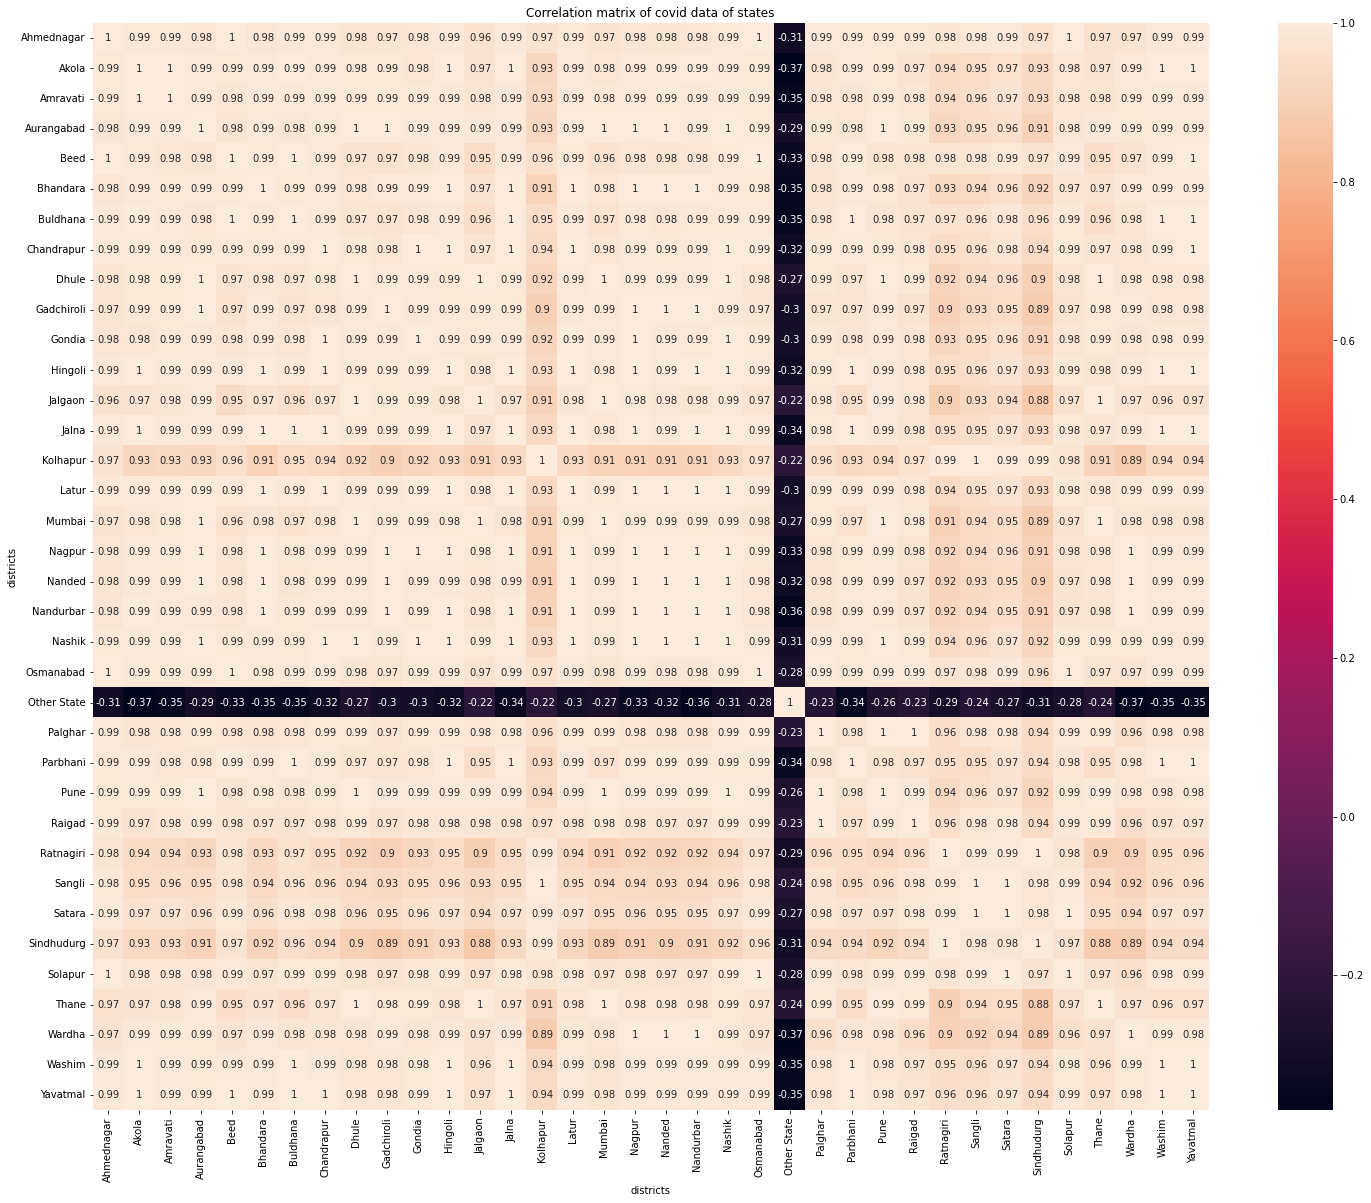

In [13]:
plt.subplots(figsize=(25,20))
# correlation_mat = x.corr()


sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of covid data of states")

plt.xlabel("districts")

plt.ylabel("districts")
plt.show()

From the above matrix it is clear that the correlation values of the districts  are high with osmanabad. Therefore chosing it as a hotspot.

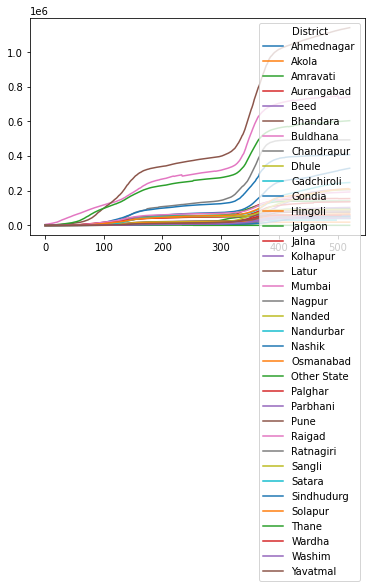

In [14]:
x.plot()
pyplot.show()

# **Temporal correlation of the hotspot ditrict**

In [15]:
y = ds[ds.District == 'Osmanabad']
y.drop(columns='Recovered')
y.head()

,Date,District,Confirmed,Recovered
184,2020-04-26,Osmanabad,3,3
600,2020-04-27,Osmanabad,3,3
1024,2020-04-28,Osmanabad,3,3
1453,2020-04-29,Osmanabad,3,3
1886,2020-04-30,Osmanabad,3,3


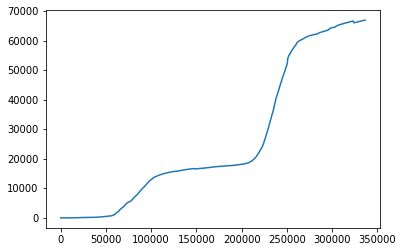

In [16]:
y['Confirmed'].plot()
pyplot.show()

In [17]:
y['Date']= pd.to_datetime(y['Date'])

per = y.Date.dt.to_period("M")
# print(per)
g = y.groupby(per)
f= g.sum()
print(f)
y.to_csv('GROUPED.csv')

         Confirmed  Recovered
Date                         
2020-04         15         15
2020-05        579        162
2020-06       4531       3114
2020-07      14731       9329
2020-08     109901      58795
2020-09     279228     191789
2020-10     443076     360830
2020-11     475885     427513
2020-12     516011     484209
2021-01     534074     507374
2021-02     496704     473026
2021-03     590155     545344
2021-04     875924     692723
2021-05    1542347    1308264
2021-06    1813172    1724476
2021-07    1948107    1870933
2021-08    2024030    1936347
2021-09    1861822    1789603


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



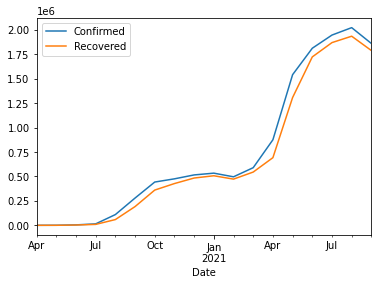

In [18]:
f.plot()
pyplot.show()

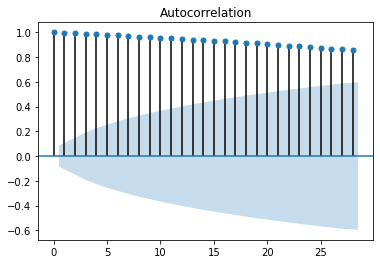

In [19]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = plot_acf(y['Confirmed'])
plt.show()

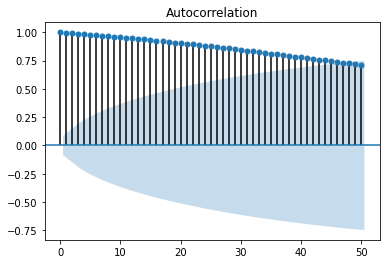

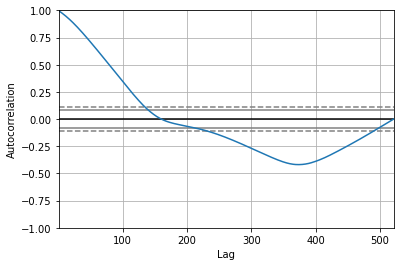

In [20]:
plot_acf(y['Confirmed'], lags=50)
pyplot.show()
x = pd.plotting.autocorrelation_plot(y['Confirmed'])
  
# ploting the Curve
x.plot()
  
# Display
plt.show()

partial auto correlation

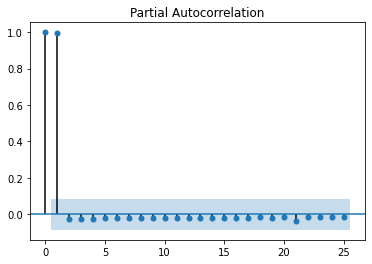

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y['Confirmed'], lags=25)
pyplot.show()

# **New csv file**

In [22]:
col_name = correlation_mat.columns.values.tolist()
res = []
for index, element in enumerate(correlation_mat['Osmanabad']):
  if element >= 0.98:
    res.append(col_name[index])

print(res)
fs=ds.loc[ds['District'].isin(res)]
# fs.to_csv('cc.csv')
# print(fs)

['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed', 'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gondia', 'Hingoli', 'Jalna', 'Latur', 'Nagpur', 'Nandurbar', 'Nashik', 'Osmanabad', 'Palghar', 'Parbhani', 'Pune', 'Raigad', 'Sangli', 'Satara', 'Solapur', 'Washim', 'Yavatmal']


**ENTROPY CALCULATION**

In [23]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/shee35/ML-Dataset/main/osmanabad_Sp_Tp_data.csv')
print (df)



     sno      Dates  Current  Temporal        Spatial
0      1  4/26/2020        3       3.0      74.360000
1      2  4/27/2020        3       3.0      76.692308
2      3  4/28/2020        3       3.0      86.000000
3      4  4/29/2020        3       3.0      88.423077
4      5  4/30/2020        3       3.0      92.346154
..   ...        ...      ...       ...            ...
516  517  9/24/2021    66771   66676.2  174665.769200
517  518  9/25/2021    66838   66729.4  174754.538500
518  519  9/26/2021    66853   66773.8  174842.730800
519  520  9/27/2021    66868   66812.2  174716.038500
520  521  9/28/2021    66915   66849.0  174790.884600

[521 rows x 5 columns]


In [24]:
!pip install pyentrp

  Created wheel for pyentrp: filename=pyentrp-0.7.1-py2.py3-none-any.whl size=6268 sha256=fb362cedb26a22cab018aaf227300bb247c6cc20315ae0aa95819f459082467f
  Stored in directory: /root/.cache/pip/wheels/7b/03/99/c6c9772f161ba7667c2198ad2e1beee3772f6364a8c4388266
Successfully built pyentrp


In [25]:
print(df['Current'])

0          3
1          3
2          3
3          3
4          3
       ...  
516    66771
517    66838
518    66853
519    66868
520    66915
Name: Current, Length: 521, dtype: int64


In [26]:
print(df['Temporal'])

0          3.0
1          3.0
2          3.0
3          3.0
4          3.0
        ...   
516    66676.2
517    66729.4
518    66773.8
519    66812.2
520    66849.0
Name: Temporal, Length: 521, dtype: float64


In [27]:
print(df['Spatial'])

0          74.360000
1          76.692308
2          86.000000
3          88.423077
4          92.346154
           ...      
516    174665.769200
517    174754.538500
518    174842.730800
519    174716.038500
520    174790.884600
Name: Spatial, Length: 521, dtype: float64


In [28]:
from pyentrp import entropy as ent



ts = df['Current']
std_ts = np.std(ts)
entropy_current_data = ent.permutation_entropy(ts, 3, 1, normalize=False)
entropy_current_data


0.11314736996401044

In [29]:

ts = df['Temporal']
std_ts = np.std(ts)
entropy_temporal_data = ent.permutation_entropy(ts, 3, 1, normalize=False)
entropy_temporal_data


0.19527114827947303

In [30]:

ts = df['Spatial']
std_ts = np.std(ts)
entropy_spatial_data = ent.permutation_entropy(ts, 3, 1, normalize=False)
entropy_spatial_data


0.040306367755142514

In [31]:
print("ENTROPY OF CURRENT DATA ",entropy_current_data)


ENTROPY OF CURRENT DATA  0.11314736996401044


In [32]:
print("ENTROPY OF TEMPORAL DATA ",entropy_temporal_data)


ENTROPY OF TEMPORAL DATA  0.19527114827947303


In [33]:
print("ENTROPY OF SPATIAL DATA ",entropy_spatial_data)

ENTROPY OF SPATIAL DATA  0.040306367755142514


In [34]:
df["Derived"] = (df["Current"]*entropy_current_data +  df["Spatial"]*entropy_spatial_data + df["Temporal"]* entropy_temporal_data)
df.to_csv('newcsv.csv')
df

,sno,Dates,Current,Temporal,Spatial,Derived
0,1,4/26/2020,3,3.0,74.360000,3.922437
1,2,4/27/2020,3,3.0,76.692308,4.016444
2,3,4/28/2020,3,3.0,86.000000,4.391603
3,4,4/29/2020,3,3.0,88.423077,4.489269
4,5,4/30/2020,3,3.0,92.346154,4.647394
...,...,...,...,...,...,...
516,517,9/24/2021,66771,66676.2,174665.769200,27615.043904
517,518,9/25/2021,66838,66729.4,174754.538500,27636.591171
518,519,9/26/2021,66853,66773.8,174842.730800,27650.513132
519,520,9/27/2021,66868,66812.2,174716.038500,27654.602248


# **ADF(Augmented Dickey–Fuller) Testing**

In [35]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [36]:
result = adfuller(df['Derived'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
print(f'observations used: {result[3]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}: {value}') 

ADF Statistic: -0.27925597101134114
n_lags: 17
p-value: 0.928391356920488
observations used: 503
Critial Values:
   1%: -3.4434175660489905
Critial Values:
   5%: -2.8673031724657454
Critial Values:
   10%: -2.5698395516760275


Here the value of ADF static is lower than any of the critical values but the value of p is higher than the significance level of 0.05.
So, it is not a stationary series. 

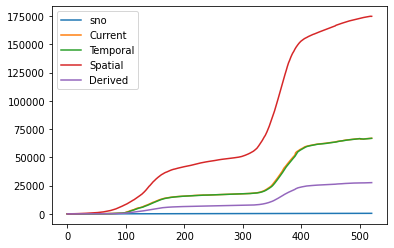

In [37]:

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/Jyotika999/MINI-PROJECT-/main/districts%20(1).csv', header=0, index_col=0)
df.plot()
pyplot.show()

In [38]:
# f grouped monthly data of osmanabad 
print(f)
f.to_csv('GROUPED_OSMANABAD.csv')

         Confirmed  Recovered
Date                         
2020-04         15         15
2020-05        579        162
2020-06       4531       3114
2020-07      14731       9329
2020-08     109901      58795
2020-09     279228     191789
2020-10     443076     360830
2020-11     475885     427513
2020-12     516011     484209
2021-01     534074     507374
2021-02     496704     473026
2021-03     590155     545344
2021-04     875924     692723
2021-05    1542347    1308264
2021-06    1813172    1724476
2021-07    1948107    1870933
2021-08    2024030    1936347
2021-09    1861822    1789603


In [39]:
hotspot = pd.read_csv('/content/GROUPED_OSMANABAD.csv')

In [40]:
hotspot.head()

,Date,Confirmed,Recovered
0,2020-04,15,15
1,2020-05,579,162
2,2020-06,4531,3114
3,2020-07,14731,9329
4,2020-08,109901,58795


In [41]:
hotspot.tail()

,Date,Confirmed,Recovered
13,2021-05,1542347,1308264
14,2021-06,1813172,1724476
15,2021-07,1948107,1870933
16,2021-08,2024030,1936347
17,2021-09,1861822,1789603


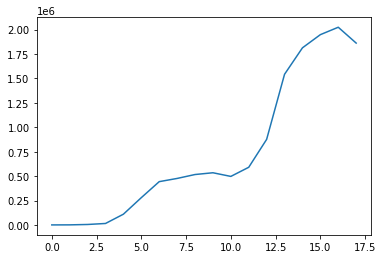

In [42]:

plt.plot(hotspot["Confirmed"])

In [43]:

X = hotspot["Confirmed"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 8.152874
p-value: 1.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Failed to Reject Ho - Time Series is Non-Stationary


The P-value is just over 0.99, providing strong evidence that the dataset isn’t stationary.


MANUAL TESTING OF DIFFERENT DIFFERENCING ORDERS

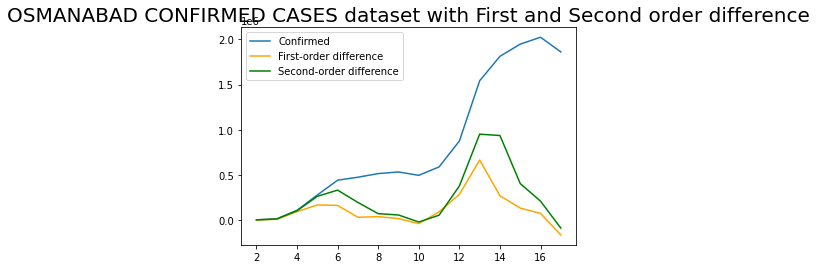

In [44]:
# First and second order difference
hotspot['hotspot_Diff1'] = hotspot['Confirmed'].diff()
hotspot['hotspot_Diff2'] = hotspot['Confirmed'].diff(2)

# Don't forget to drop missing values
hotspot = hotspot.dropna()

# Plot
plt.title('OSMANABAD CONFIRMED CASES dataset with First and Second order difference', size=20)
plt.plot(hotspot['Confirmed'], label='Confirmed')
plt.plot(hotspot['hotspot_Diff1'], label='First-order difference', color='orange')
plt.plot(hotspot['hotspot_Diff2'], label='Second-order difference', color='green')
plt.legend();

In [45]:
# Perform ADF test
adf_diff_1 = adfuller(hotspot['hotspot_Diff1'])
adf_diff_2 = adfuller(hotspot['hotspot_Diff2'])

# Extract P-values
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

P-value for 1st order difference: 1.0
P-value for 2nd order difference: 0.99908


# **KPSS (Kwiatkowski–Phillips–Schmidt–Shin ) Test**

In [46]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(y['Confirmed'])


Results of KPSS Test:
Test Statistic            2.413577
p-value                   0.010000
#Lags Used               19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



**WORKING WITH CORRELATION MATRIX OF PUNE**

---




In [47]:
pune_corr = pd.read_csv('CORRELATION_PUNE.csv')

In [48]:
pune_corr

,District,Ahmednagar,Akola,Amravati,Aurangabad,Beed,Bhandara,Buldhana,Chandrapur,Dhule,Gadchiroli,Gondia,Hingoli,Jalgaon,Jalna,Kolhapur,Latur,Mumbai,Nagpur,Nanded,Nandurbar,Nashik,Osmanabad,Other State,Palghar,Parbhani,Pune,Raigad,Ratnagiri,Sangli,Satara,Sindhudurg,Solapur,Thane,Wardha,Washim,Yavatmal
0,Ahmednagar,1.000000,0.986128,0.985843,0.982064,0.996834,0.982997,0.992560,0.991879,0.976636,0.974681,0.982518,0.990836,0.963278,0.990143,0.969746,0.988871,0.971909,0.981351,0.976189,0.979905,0.988894,0.997687,-0.306145,0.990593,0.987949,0.986109,0.988025,0.976825,0.984886,0.993625,0.966597,0.998588,0.966093,0.970262,0.990575,0.991715
1,Akola,0.986128,1.000000,0.996700,0.991211,0.988576,0.991581,0.994658,0.990689,0.984921,0.985654,0.983665,0.995892,0.969553,0.997045,0.929229,0.991816,0.979836,0.993173,0.991145,0.994662,0.993037,0.986810,-0.366996,0.977918,0.992108,0.985206,0.972225,0.944904,0.949509,0.966662,0.933687,0.980273,0.968898,0.991873,0.998342,0.996850
2,Amravati,0.985843,0.996700,1.000000,0.992108,0.983745,0.985739,0.989595,0.989484,0.987964,0.985713,0.986782,0.992231,0.977534,0.992498,0.934479,0.989413,0.984044,0.992290,0.987013,0.990422,0.993163,0.987155,-0.352219,0.981918,0.983068,0.989044,0.979487,0.942530,0.955136,0.969686,0.930599,0.982777,0.976537,0.987552,0.993350,0.992969
3,Aurangabad,0.982064,0.991211,0.992108,1.000000,0.977063,0.989343,0.981235,0.988625,0.998747,0.995575,0.992622,0.993774,0.992163,0.993006,0.925549,0.994817,0.996687,0.996818,0.995597,0.994589,0.997875,0.986430,-0.293603,0.988683,0.981132,0.997714,0.985710,0.927080,0.948536,0.961913,0.911688,0.979671,0.992028,0.989254,0.988083,0.987427
4,Beed,0.996834,0.988576,0.983745,0.977063,1.000000,0.985526,0.997456,0.992378,0.969417,0.966192,0.977679,0.992126,0.951447,0.992211,0.961647,0.988265,0.962891,0.979634,0.975433,0.980158,0.985904,0.995404,-0.328654,0.983058,0.994762,0.978022,0.976689,0.977375,0.975745,0.987751,0.968325,0.992904,0.953499,0.969641,0.994608,0.995440
5,Bhandara,0.982997,0.991581,0.985739,0.989343,0.985526,1.000000,0.988069,0.994390,0.983752,0.989908,0.991113,0.997178,0.968986,0.997420,0.914352,0.996873,0.981919,0.996260,0.995533,0.996805,0.994543,0.984946,-0.347743,0.976211,0.994381,0.984790,0.968484,0.931400,0.939940,0.958118,0.917785,0.974924,0.970292,0.992732,0.993595,0.993508
6,Buldhana,0.992560,0.994658,0.989595,0.981235,0.997456,0.988069,1.000000,0.993085,0.973703,0.970886,0.979332,0.994298,0.955526,0.995064,0.947365,0.989433,0.966570,0.984360,0.980453,0.985390,0.988328,0.992505,-0.352935,0.979545,0.995959,0.978765,0.971991,0.965762,0.963643,0.978872,0.956158,0.987546,0.955853,0.977443,0.998202,0.998270
7,Chandrapur,0.991879,0.990689,0.989484,0.988625,0.992378,0.994390,0.993085,1.000000,0.984005,0.982556,0.995017,0.997107,0.972316,0.996434,0.938852,0.996700,0.981271,0.993044,0.987088,0.989471,0.996031,0.994779,-0.324207,0.987518,0.992683,0.988900,0.981048,0.950227,0.960732,0.975056,0.937048,0.988066,0.973826,0.981006,0.994183,0.996604
8,Dhule,0.976636,0.984921,0.987964,0.998747,0.969417,0.983752,0.973703,0.984005,1.000000,0.993805,0.991488,0.989155,0.996621,0.987519,0.921054,0.991776,0.997390,0.993954,0.992682,0.990135,0.995523,0.983030,-0.266250,0.988088,0.973378,0.997912,0.986149,0.917403,0.944512,0.956601,0.900750,0.975568,0.995090,0.983885,0.981254,0.980849
9,Gadchiroli,0.974681,0.985654,0.985713,0.995575,0.966192,0.989908,0.970886,0.982556,0.993805,1.000000,0.990675,0.988575,0.985555,0.988462,0.898419,0.990214,0.993929,0.996629,0.997044,0.995386,0.993606,0.974766,-0.299034,0.973881,0.973966,0.990525,0.972338,0.903885,0.931672,0.948555,0.886142,0.968529,0.984950,0.993487,0.981465,0.979449


In [49]:
print(pune_corr[['District', 'Pune']])

       District      Pune
0    Ahmednagar  0.986109
1         Akola  0.985206
2      Amravati  0.989044
3    Aurangabad  0.997714
4          Beed  0.978022
5      Bhandara  0.984790
6      Buldhana  0.978765
7    Chandrapur  0.988900
8         Dhule  0.997912
9    Gadchiroli  0.990525
10       Gondia  0.993716
11      Hingoli  0.991367
12      Jalgaon  0.994031
13        Jalna  0.989421
14     Kolhapur  0.939830
15        Latur  0.993893
16       Mumbai  0.995994
17       Nagpur  0.992871
18       Nanded  0.989692
19    Nandurbar  0.988340
20       Nashik  0.997001
21    Osmanabad  0.990564
22  Other State -0.262059
23      Palghar  0.995169
24     Parbhani  0.977234
25         Pune  1.000000
26       Raigad  0.993756
27    Ratnagiri  0.935704
28       Sangli  0.961082
29       Satara  0.970890
30   Sindhudurg  0.919964
31      Solapur  0.986225
32        Thane  0.994695
33       Wardha  0.979611
34       Washim  0.983761
35     Yavatmal  0.984530


In [50]:
dataset = (pune_corr[[ 'Pune']])


In [51]:
print(dataset)

        Pune
0   0.986109
1   0.985206
2   0.989044
3   0.997714
4   0.978022
5   0.984790
6   0.978765
7   0.988900
8   0.997912
9   0.990525
10  0.993716
11  0.991367
12  0.994031
13  0.989421
14  0.939830
15  0.993893
16  0.995994
17  0.992871
18  0.989692
19  0.988340
20  0.997001
21  0.990564
22 -0.262059
23  0.995169
24  0.977234
25  1.000000
26  0.993756
27  0.935704
28  0.961082
29  0.970890
30  0.919964
31  0.986225
32  0.994695
33  0.979611
34  0.983761
35  0.984530


In [52]:
dataset['Sno'] = range(1, 1+len(dataset))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
dataset.head()

,Pune,Sno
0,0.986109,1
1,0.985206,2
2,0.989044,3
3,0.997714,4
4,0.978022,5


In [54]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [55]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)

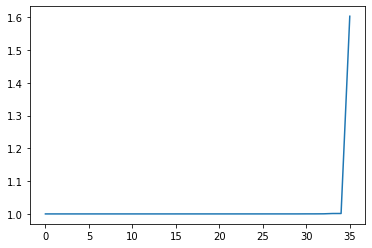

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [57]:
# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2).fit_transform(dataset)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import make_blobs


In [59]:
# Numpy array of all the cluster labels assigned to each data point
# db_default = DBSCAN(eps = 0.0375, min_samples = 2).fit(dataset)
# labels = db_default.labels_
y_pred = DBSCAN(eps=0.0375, min_samples=4).fit_predict(dataset)


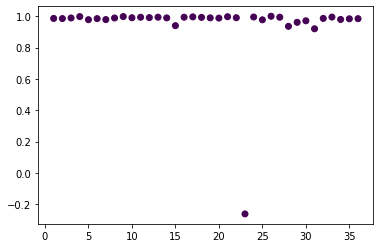

In [60]:
plt.scatter(dataset['Sno'], dataset['Pune'], c= y_pred)

In [61]:
X= dataset['Pune'].values
X= X.reshape(-1, 1)
X = StandardScaler().fit_transform(X)

In [62]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [63]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [64]:
labels_true= dataset['Sno'].values
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 1
Estimated number of noise points: 1
Homogeneity: 0.035
Completeness: 1.000
V-measure: 0.068
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.959


In [65]:

import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.read_csv('/content/newcsv.csv')

,Unnamed: 0,sno,Dates,Current,Temporal,Spatial,Derived
0,0,1,4/26/2020,3,3.0,74.360000,3.922437
1,1,2,4/27/2020,3,3.0,76.692308,4.016444
2,2,3,4/28/2020,3,3.0,86.000000,4.391603
3,3,4,4/29/2020,3,3.0,88.423077,4.489269
4,4,5,4/30/2020,3,3.0,92.346154,4.647394
...,...,...,...,...,...,...,...
516,516,517,9/24/2021,66771,66676.2,174665.769200,27615.043904
517,517,518,9/25/2021,66838,66729.4,174754.538500,27636.591171
518,518,519,9/26/2021,66853,66773.8,174842.730800,27650.513132
519,519,520,9/27/2021,66868,66812.2,174716.038500,27654.602248


In [67]:
dataset_osmanabad = pd.read_csv('/content/newcsv.csv')

In [68]:
dataset_osmanabad.head()

,Unnamed: 0,sno,Dates,Current,Temporal,Spatial,Derived
0,0,1,4/26/2020,3,3.0,74.360000,3.922437
1,1,2,4/27/2020,3,3.0,76.692308,4.016444
2,2,3,4/28/2020,3,3.0,86.000000,4.391603
3,3,4,4/29/2020,3,3.0,88.423077,4.489269
4,4,5,4/30/2020,3,3.0,92.346154,4.647394


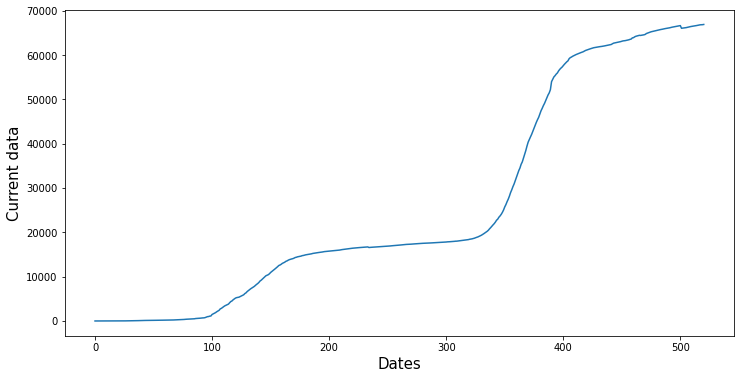

In [69]:
# Visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(dataset_osmanabad["Current"])
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Current data',fontsize=15)
plt.show()


# Rolling mean
# close_px = df['Adj Close']
# mavg = close_px.rolling(window=100).mean()

# plt.figure(figsize = (12,6))
# close_px.plot(label='TSLA')
# mavg.plot(label='mavg')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()